# Attendance Tracker


---

USE a GPU:

`> change runtime type > hardware accelerator > GPU `

In [1]:
# install face_recognition package
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=e6e7aacc246378f6916d2c8318b6d3cf809e348d2ce6ff5e338f5f44e3337b77
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
# import libraries
import requests
import zipfile
import os

# image stuff
import face_recognition
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps, ImageEnhance
import cv2
from google.colab.patches import cv2_imshow

# 3. Target Headshot Images


---

The zip file contains the headshots of MSBA students.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# download the file
!gdown --id 1ykXmEXCwqVGZTzTk73W-nmlWdK4o3qDy
# https://drive.google.com/file/d/1ykXmEXCwqVGZTzTk73W-nmlWdK4o3qDy/view?usp=share_link


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ykXmEXCwqVGZTzTk73W-nmlWdK4o3qDy
To: /content/2022 MSBA Headshot Photos.zip
100% 283M/283M [00:04<00:00, 57.0MB/s]


In [ ]:
!gdown --id 1qMK4Hf4qsbXkSftCrjVINzE-ebblm9AO
# https://drive.google.com/file/d/1qMK4Hf4qsbXkSftCrjVINzE-ebblm9AO/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qMK4Hf4qsbXkSftCrjVINzE-ebblm9AO
To: /content/ExampleAttendance.zip
100% 3.11M/3.11M [00:00<00:00, 137MB/s]


In [ ]:
!unzip "2022 MSBA Headshot Photos.zip"
print("-- images found in: 2022 MSBA Headshot Photos director -- ")

Archive:  2022 MSBA Headshot Photos.zip
  inflating: 2022 MSBA Headshot Photos/Jenny Yue.jpg  
  inflating: 2022 MSBA Headshot Photos/Kexuan Zhao.jpg  
  inflating: 2022 MSBA Headshot Photos/Daniel Marino_1.jpg  
  inflating: 2022 MSBA Headshot Photos/Brian Sun.jpg  
  inflating: 2022 MSBA Headshot Photos/Zhixuan Liao.jpg  
  inflating: 2022 MSBA Headshot Photos/Jonathan Buck.jpg  
  inflating: 2022 MSBA Headshot Photos/Jack Lazor.jpg  
  inflating: 2022 MSBA Headshot Photos/Ryiane Nathan.jpg  
  inflating: 2022 MSBA Headshot Photos/Xinwei Li.jpg  
  inflating: 2022 MSBA Headshot Photos/Daniel Marino.jpg  
  inflating: 2022 MSBA Headshot Photos/Ziwei (James) Kou.jpg  
  inflating: 2022 MSBA Headshot Photos/Hui Chih _Sean_ Su.jpg  
  inflating: 2022 MSBA Headshot Photos/Barry Chen.jpg  
  inflating: 2022 MSBA Headshot Photos/Isabell Carrico.jpg  
  inflating: 2022 MSBA Headshot Photos/Ruoyun Mei.jpg  
  inflating: 2022 MSBA Headshot Photos/Anne Marie Faris.jpg  
  inflating: 2022 MSBA H

In [ ]:
!unzip "ExampleAttendance.zip.zip"
print("-- images found in: 2022 MSBA Attendance Example c -- ")

unzip:  cannot find or open ExampleAttendance.zip.zip, ExampleAttendance.zip.zip.zip or ExampleAttendance.zip.zip.ZIP.
-- images found in: 2022 MSBA Attendance Example c -- 


In [4]:
import os
# List all the files in the unzipped folder
files = os.listdir('/content/2024 MSBA Headshot Photos')

# Print the list of files
print(files)

['Quinn_Poole.jpg', 'John_William_Null.jpg', 'Haopeng_Liu.jpg', 'Kendall_Ashley_Hilson.jpg', 'Shuzhe_Wang.jpg', 'Jeremy_Brian_Nurding.jpg', 'Kaushik_Rajaram.jpg', 'Qian_Chen.jpg', 'Logan_Trujillo.jpg', 'Manling_Shi.jpg', 'Yiming_Xu.jpg', 'Zaul_Alexander_Perez.jpg', 'Andrea_Chen.jpg', 'Ruochen_Bao.jpg', 'Alicia_Rand_Bodoia.jpg', 'Nathalie_Lisa_Friedman.jpg', 'Estefani_Santiago_Gatica.jpg', 'Alfredo_Enrique_Suarez.jpg', 'Khushi_Arya.jpg', 'Lu_Xing.jpg', 'Qin_Miao.jpg', 'Evan_Anderson_Gilbert.jpg', 'Wei_Tan.jpg', 'Wentong_Guo.jpg', 'Cheuk_Yui_Marcus_Chan.jpg', 'Kaitlyn_R_Vickers.jpg', 'Allen_Gail_Smith.jpg', 'Garhett_William_Sessions.jpg', 'Chengzhan_Shen.jpg', 'Elizabeth_G_Higgins.jpg', 'Yutong_Ouyang.jpg', 'Max_Koontz.jpg', 'Meghan_O_Malley.jpg', 'Dillon_Hunter_Aryeh.jpg', 'Millie_C_Garrett.jpg', 'Anthony_X_Ayala.jpg', 'Raleigh_Coolidge_Conway.jpg', 'Tianyu_Cui.jpg', 'Jodie_Elizabeth_Brine.jpg', 'Nathanael_Hunter_Kraus.jpg', 'Anne_M_Perry.jpg', 'Meryl_Criswell_Kaduboski.jpg', 'Andrew_Ll

## Display a Face


---

Here we are going to use the PIL library to open an image and display it in our notebook. Because these images are so large i'm going to cut it in half!




Original image size: 4032 3024
Resized image size: 1008 756


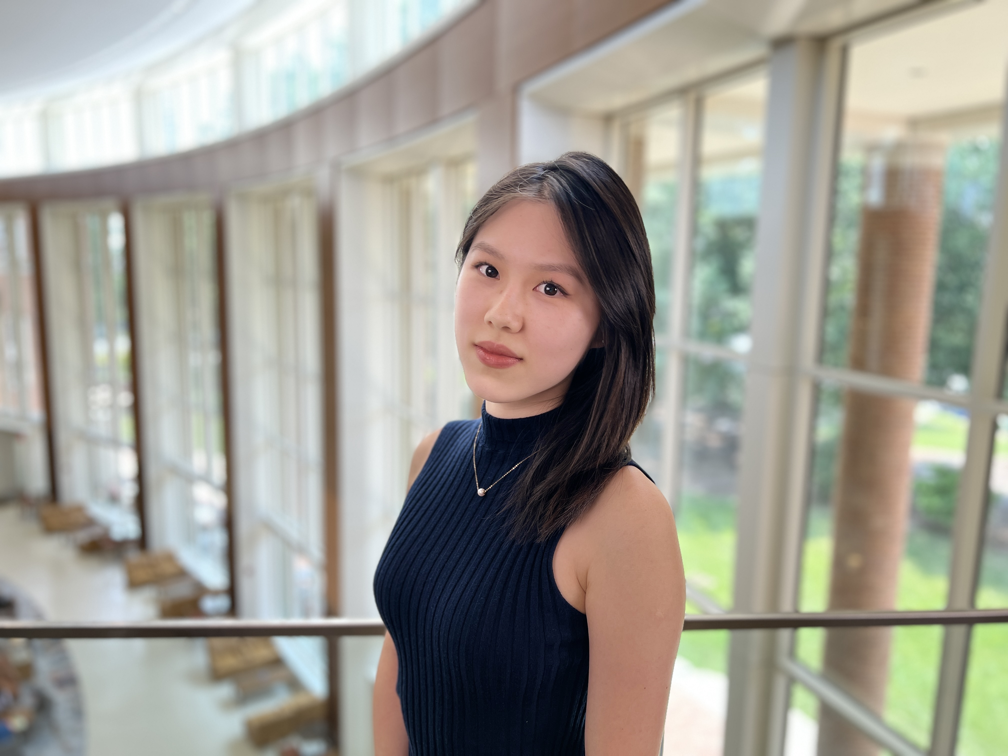

In [6]:
# Define the URL of the image file on GitHub
image_file = "/content/2024 MSBA Headshot Photos/Hewei_Shen.jpg"

# open an image
image = Image.open(image_file)

# Get the original size of the image
width, height = image.size
print("Original image size:", width, height)

# Resize the image to half its original size
new_size = (int(width/4), int(height/4))
resized_image = image.resize(new_size)

new_width, new_height = resized_image.size
print("Resized image size:", new_width, new_height)

# Display the image in the Colab notebook
display(resized_image)

# Get the new size of the image


## load faces into a dictionary


---
this makes a dictionary of image to encoding, we need the encoding to make a match. this is a 1-time but slow process! speed it up by paying for a faster GPU!



In [7]:
def face_load_source():
  face_dict = {}

  for file in files:
    img_file = "/content/2024 MSBA Headshot Photos/{}".format(file)
    print(img_file)
    # load face
    _t = face_recognition.load_image_file(img_file)
    # generate encoding
    _x = face_recognition.face_encodings(_t)[0]
    face_dict[img_file] = _x

  return face_dict

# create a dictionary of face encodings
face_source_encodings = face_load_source()

/content/2024 MSBA Headshot Photos/Quinn_Poole.jpg
/content/2024 MSBA Headshot Photos/John_William_Null.jpg
/content/2024 MSBA Headshot Photos/Haopeng_Liu.jpg
/content/2024 MSBA Headshot Photos/Kendall_Ashley_Hilson.jpg
/content/2024 MSBA Headshot Photos/Shuzhe_Wang.jpg
/content/2024 MSBA Headshot Photos/Jeremy_Brian_Nurding.jpg
/content/2024 MSBA Headshot Photos/Kaushik_Rajaram.jpg
/content/2024 MSBA Headshot Photos/Qian_Chen.jpg
/content/2024 MSBA Headshot Photos/Logan_Trujillo.jpg
/content/2024 MSBA Headshot Photos/Manling_Shi.jpg
/content/2024 MSBA Headshot Photos/Yiming_Xu.jpg
/content/2024 MSBA Headshot Photos/Zaul_Alexander_Perez.jpg
/content/2024 MSBA Headshot Photos/Andrea_Chen.jpg
/content/2024 MSBA Headshot Photos/Ruochen_Bao.jpg
/content/2024 MSBA Headshot Photos/Alicia_Rand_Bodoia.jpg
/content/2024 MSBA Headshot Photos/Nathalie_Lisa_Friedman.jpg
/content/2024 MSBA Headshot Photos/Estefani_Santiago_Gatica.jpg
/content/2024 MSBA Headshot Photos/Alfredo_Enrique_Suarez.jpg
/co

# Save the Encodings Dictionary
---
we do this so we don't have to re-run the encodings step again!

In [8]:
import pickle
# Save the face encodings to a file
with open('encodings2.pickle', 'wb') as f:
    pickle.dump(face_source_encodings, f)

In [9]:
# Load the encodings pickle if you loose it
with open("encodings2.pickle", "rb") as f:
    face_source_encodings = pickle.load(f)

In [10]:
# example encoding
face_source_encodings['/content/2024 MSBA Headshot Photos/Hewei_Shen.jpg']

array([-9.69778597e-02,  5.70289716e-02,  6.34306371e-02, -8.37665945e-02,
       -8.84090662e-02,  2.79948115e-02, -2.19490565e-02, -1.01843625e-01,
        1.38726130e-01, -1.90802604e-01,  2.94067174e-01, -1.02422886e-01,
       -2.43048549e-01, -3.13547105e-02, -6.75721020e-02,  2.01120049e-01,
       -1.11856021e-01, -1.23548605e-01, -4.48798388e-02,  1.65626258e-02,
        9.22197998e-02, -3.13436612e-03, -1.63804740e-02,  8.35099295e-02,
       -9.99089181e-02, -2.98210144e-01, -1.08478762e-01, -2.57194042e-04,
       -9.08691436e-02, -9.87645239e-02, -4.94344532e-02,  2.42377892e-02,
       -2.03247339e-01, -2.31554657e-02, -1.94212273e-02,  8.54183957e-02,
       -5.44071123e-02, -9.78767127e-02,  1.27100289e-01, -2.20261998e-02,
       -2.68662781e-01,  5.26359379e-02,  8.02924186e-02,  2.13806868e-01,
        1.27025336e-01,  3.56421433e-02, -3.79745364e-02, -1.63255662e-01,
        1.01067960e-01, -2.35164493e-01,  4.17355634e-02,  1.29974633e-01,
        4.96799871e-02,  

In [11]:
# 1. load target image
target_file = "/content/2024_attendance/IMG_1935.jpg"

# Load the image
target_img = face_recognition.load_image_file(target_file)

# Get the locations of all faces in the image
face_locations = face_recognition.face_locations(target_img)

# Print the number of faces detected
print("Number of faces detected:", len(face_locations))


Number of faces detected: 11


In [12]:
# Convert the image from RGB to BGR
image = cv2.cvtColor(target_img, cv2.COLOR_RGB2BGR)

# Loop over each face location and draw a rectangle
for (top, right, bottom, left) in face_locations:
    # Draw a rectangle around the face
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the image with rectangles around the faces
cv2_imshow(image)


Output hidden; open in https://colab.research.google.com to view.

In [13]:
# Convert the dictionary values to a list of face encodings
face_source_encodings_list = list(face_source_encodings.values())

# Get the locations and encodings of all faces in the image
face_locations = face_recognition.face_locations(target_img)
face_encodings = face_recognition.face_encodings(target_img, face_locations)

# Loop over each face encoding and compare it to the encodings in the dictionary
for encoding in face_encodings:
    # Calculate the distance between the encoding and each encoding in the dictionary
    distances = face_recognition.face_distance(face_source_encodings_list, encoding)

    # Find the index of the closest match in the source dictionary
    closest_match_index = distances.argmin()

    # Get the name of the closest match in the source dictionary
    closest_match_name = list(face_source_encodings.keys())[closest_match_index]

    # Print the name of the closest match
    print("Closest match:", closest_match_name)

Closest match: /content/2024 MSBA Headshot Photos/Logan_Trujillo.jpg
Closest match: /content/2024 MSBA Headshot Photos/Jeremy_Brian_Nurding.jpg
Closest match: /content/2024 MSBA Headshot Photos/Patrick_Ryan_Weimaker.jpg
Closest match: /content/2024 MSBA Headshot Photos/Raleigh_Coolidge_Conway.jpg
Closest match: /content/2024 MSBA Headshot Photos/Cheuk_Yui_Marcus_Chan.jpg
Closest match: /content/2024 MSBA Headshot Photos/Mengyao_Liu.jpg
Closest match: /content/2024 MSBA Headshot Photos/Joseph_Macon_Barker.jpg
Closest match: /content/2024 MSBA Headshot Photos/Zaul_Alexander_Perez.jpg
Closest match: /content/2024 MSBA Headshot Photos/Jash_Sanjaybhai_Vachhani.jpg
Closest match: /content/2024 MSBA Headshot Photos/Anne_M_Perry.jpg
Closest match: /content/2024 MSBA Headshot Photos/Marcus_Cole_cooper.jpg


In [14]:
# Convert the dictionary values to a list of face encodings
face_source_encodings_list = list(face_source_encodings.values())
# Loop over each face encoding in the target image and compare it to the encodings in the source dictionary
for (top, right, bottom, left), encoding in zip(face_locations, face_encodings):
    # Calculate the distance between the encoding and each encoding in the dictionary
    distances = face_recognition.face_distance(face_source_encodings_list, encoding)

    # Find the index of the closest match in the source dictionary
    closest_match_index = distances.argmin()

    # Get the name of the closest match in the source dictionary
    closest_match_name = list(face_source_encodings.keys())[closest_match_index]
    similarity = 1 -  distances[closest_match_index]
    # Get the file name without the extension
    file_name = os.path.splitext(os.path.basename(closest_match_name))[0]
    # Split the file name on the underscore character and join the first and last names with a space

    last_space_index = file_name.rfind(" ")
    if last_space_index != -1:
        first_name = file_name[:last_space_index]
        last_name = file_name[last_space_index+1:].rstrip("_1").rstrip("_2")
        # full_name = "{} {} - {:.2f}".format(first_name,last_name,similarity)
        full_name = "{} {}".format(first_name,last_name)
    else:
        full_name = file_name

    # Add the period to the end of the full name
    full_name_period = f"{full_name}."

    # Draw a label on the image
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(image, full_name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1)

    # Print the name of the closest match
    print("Closest match:", full_name)

cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

## Wrap it all in a function


---




In [20]:
def search_attendance(target_file):
  attendance_list = []
  # Load the image
  target_img = face_recognition.load_image_file(target_file)
  # convert image
  image = cv2.cvtColor(target_img, cv2.COLOR_RGB2BGR)

  # Get the locations of all faces in the image
  face_locations = face_recognition.face_locations(target_img)

  # Print the number of faces detected
  print("Number of faces detected:", len(face_locations))

  # Get the locations and encodings of all faces in the image
  face_locations = face_recognition.face_locations(target_img)
  face_encodings = face_recognition.face_encodings(target_img, face_locations)

  # Loop over each face encoding in the target image and compare it to the encodings in the source dictionary
  for (top, right, bottom, left), encoding in zip(face_locations, face_encodings):
      # Calculate the distance between the encoding and each encoding in the dictionary
      distances = face_recognition.face_distance(face_source_encodings_list, encoding)

      # Find the index of the closest match in the source dictionary
      closest_match_index = distances.argmin()

      # Get the name of the closest match in the source dictionary
      closest_match_name = list(face_source_encodings.keys())[closest_match_index]
      similarity = 1 -  distances[closest_match_index]
      # Get the file name without the extension
      file_name = os.path.splitext(os.path.basename(closest_match_name))[0]
      # Split the file name on the underscore character and join the first and last names with a space

      # last_space_index = file_name.rfind(" ")
      # if last_space_index != -1:
      #     first_name = file_name[:last_space_index]
      #     last_name = file_name[last_space_index+1:].rstrip("_1").rstrip("_2")
      #     full_name = "{} {}({:.0%})".format(first_name,last_name,similarity)
      #     #full_name = "{} {}".format(first_name,last_name)
      # else:
      #     full_name = file_name
      full_name = "{}({:.0%})".format(file_name, similarity)


      # Add the period to the end of the full name
      full_name_period = f"{full_name}."

      # Draw a label on the image
      cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
      cv2.putText(image, full_name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX, 0.7, (255, 255, 255), 1)

      # Print the name of the closest match
      print("Closest match:", full_name)
      attendance_list.append(full_name)


  cv2_imshow(image)
  return attendance_list, image

In [21]:
# 1. load target image
target_file = "/content/2024_attendance/IMG_1935.jpg"
attendance_list, output_image = search_attendance(target_file)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
# 1. load target image
target_file = "/content/2024_attendance/IMG_1935.jpg"
image = Image.open(target_file)

# Rotate the image by 180 degrees
flipped_image = image.rotate(180)
# Rotate the image by 180 degrees
flipped_image
# Save the flipped image
flipped_image.save("/content/2024_attendance/IMG_1935.jpg")
attendance_list, output_image = search_attendance(target_file)


Output hidden; open in https://colab.research.google.com to view.

In [23]:
# 1. load target image
target_file = "/content/2024_attendance/IMG_1936.jpg"
attendance_list, output_image = search_attendance(target_file)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
# 1. load target image
target_file = "/content/2024_attendance/IMG_1937.jpg"
attendance_list, output_image = search_attendance(target_file)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
%%shell
jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/UseCase2FR.ipynb' --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/UseCase2FR.ipynb to html
[NbConvertApp] Writing 1655655 bytes to /content/drive/MyDrive/Colab Notebooks/UseCase2FR.html
